In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('adult.csv')

In [3]:
def clean_data(df):
    df = df.replace('?', np.nan)
    
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
    df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
    df['native.country'] = df['native.country'].fillna('United-States')
    
    le = LabelEncoder()
    categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 
                       'relationship', 'race', 'sex', 'native.country', 'income']
    
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    return df

df_cleaned = clean_data(df.copy())

print(df_cleaned.head())

   age  workclass  fnlwgt  education  education.num  marital.status  \
0   90          3   77053         11              9               6   
1   82          3  132870         11              9               6   
2   66          3  186061         15             10               6   
3   54          3  140359          5              4               0   
4   41          3  264663         15             10               5   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0           9             1     4    0             0          4356   
1           3             1     4    0             0          4356   
2           9             4     2    0             0          4356   
3           6             4     4    0             0          3900   
4           9             3     4    0             0          3900   

   hours.per.week  native.country  income  
0              40              38       0  
1              18              38       0  
2              40   

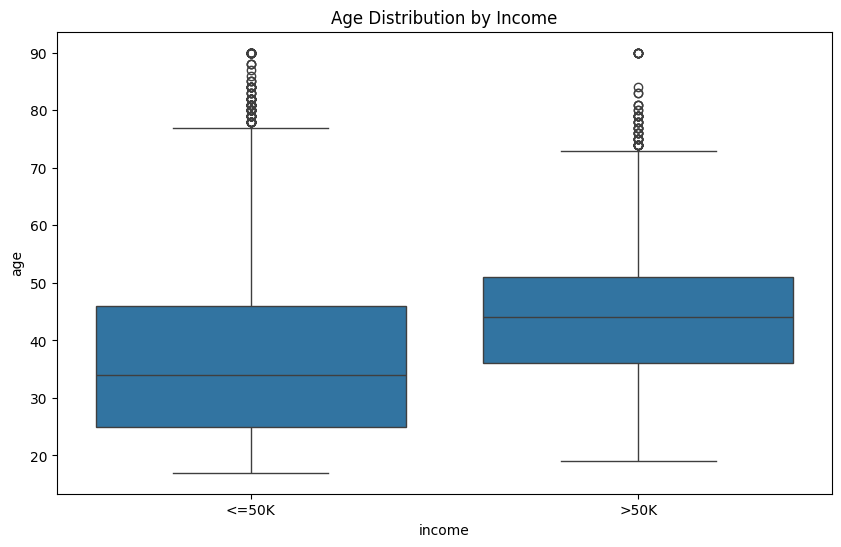

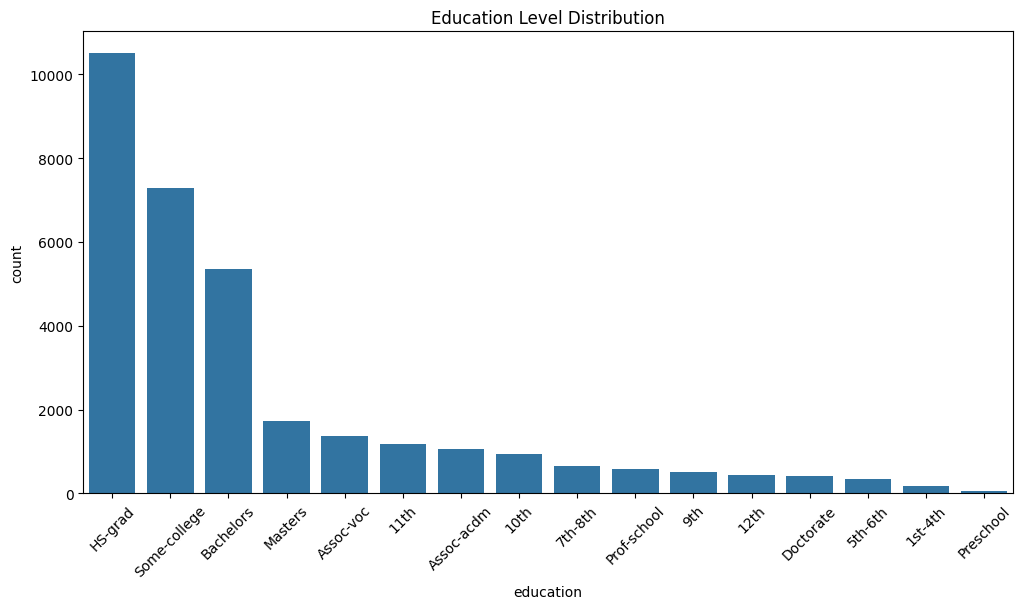

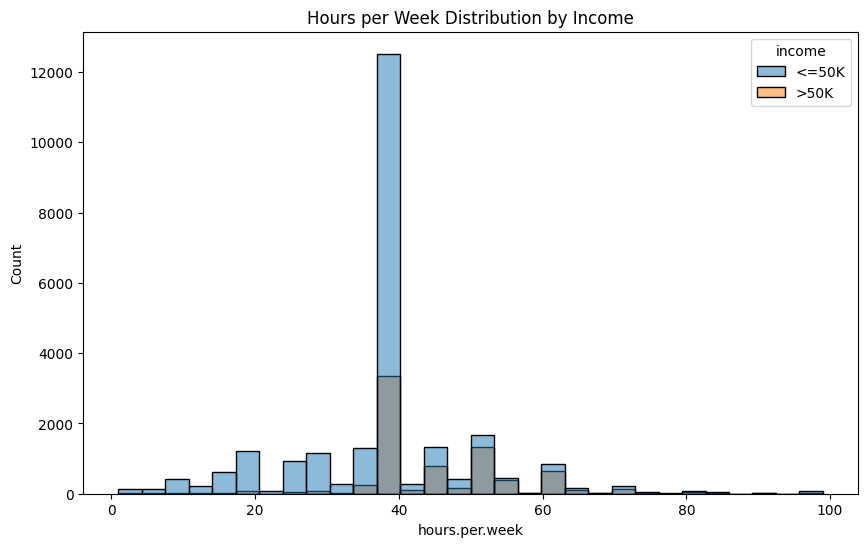

In [4]:
def visualize_data(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='income', y='age', data=df)
    plt.title('Age Distribution by Income')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title('Education Level Distribution')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='hours.per.week', hue='income', bins=30)
    plt.title('Hours per Week Distribution by Income')
    plt.show()

visualize_data(df) 

In [5]:
X = df_cleaned.drop(['income', 'education'], axis=1) 
y = df_cleaned['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (26048, 13)
Testing set shape: (6513, 13)


In [6]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

print("\nModel Intercept:", model.intercept_[0])
print("Top 5 important features and their coefficients:")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': abs(model.coef_[0])
}).sort_values('coefficient', ascending=False).head()
print(feature_importance)

y_pred = model.predict(X_test_scaled)

print("\nModel Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nSample Predictions vs Actual Values:")
sample_indices = np.random.randint(0, len(y_test), 5)
sample_predictions = pd.DataFrame({
    'Actual': y_test.iloc[sample_indices],
    'Predicted': y_pred[sample_indices]
})
print(sample_predictions)


Model Intercept: -1.4929161531806698
Top 5 important features and their coefficients:
           feature  coefficient
9     capital.gain     2.367447
3    education.num     0.866934
0              age     0.466601
8              sex     0.436066
11  hours.per.week     0.367542

Model Evaluation:

Confusion Matrix:
[[4684  292]
 [ 853  684]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4976
           1       0.70      0.45      0.54      1537

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513


Sample Predictions vs Actual Values:
       Actual  Predicted
31885       0          0
22796       0          0
12353       1          0
16069       0          0
10378       0          0


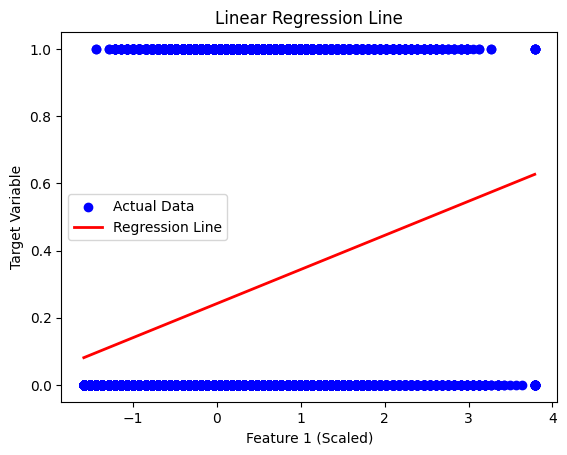

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled[:, 0].reshape(-1, 1), y_train)  # Using first feature for visualization

X_sorted = np.sort(X_train_scaled[:, 0].reshape(-1, 1), axis=0)
y_pred = model.predict(X_sorted)

plt.scatter(X_train_scaled[:, 0], y_train, color="blue", label="Actual Data")
plt.plot(X_sorted, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Target Variable")
plt.title("Linear Regression Line")
plt.legend()
plt.show()



The model's intercept is -1.49, meaning the base prediction leans toward lower-income classifications unless influenced by other features. The most important factor in predicting high income is capital gain, followed by education level, age, sex, and hours worked per week.

The confusion matrix shows that while the model correctly identifies most low-income individuals (4684 out of 4976), it struggles more with high-income cases, misclassifying 853 of them. The precision for predicting high income is 0.70, meaning when it predicts high income, it's correct 70% of the time. However, the recall for high income is lower at 0.45, indicating it misses many actual high-income cases.

Overall, the model has an accuracy of 82%, but its ability to correctly identify high-income individuals could be improved by better feature engineering or a more complex model.

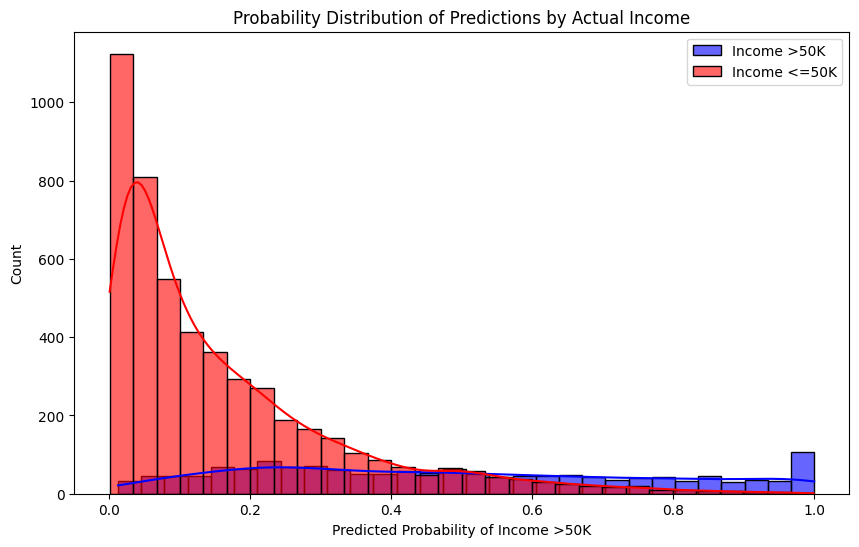

In [ ]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]  

plt.figure(figsize=(10, 6))
sns.histplot(y_probs[y_test == 1], bins=30, kde=True, color='blue', label='Income >50K', alpha=0.6)
sns.histplot(y_probs[y_test == 0], bins=30, kde=True, color='red', label='Income <=50K', alpha=0.6)

plt.xlabel("Predicted Probability of Income >50K")
plt.ylabel("Count")
plt.title("Probability Distribution of Predictions by Actual Income")
plt.legend()
plt.show()



The model is good at predicting low-income individuals since most of them have probabilities close to 0, meaning the model is confident in classifying them correctly. However, it struggles with high-income individuals, as their predicted probabilities are more spread out instead of being tightly clustered near 1. This suggests some misclassification, where the model isn’t as confident in identifying high-income cases. Improving features, adjusting the classification threshold, or using a more complex model could help make better predictions.